# *Linear Regression*
Linear regression is a fundamental and widely-used statistical technique that aims to establish a relationship between two or more variables. It seeks to model the linear association between a dependent variable and one or more independent variables, enabling predictions and understanding of the underlying data patterns.

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [163]:
data = pd.read_csv("clean_weather.csv")
data = data.ffill()

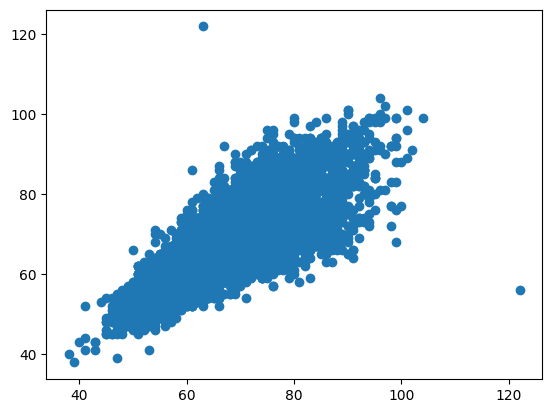

In [164]:
x = data[["tmax"]].copy()
X = data[["tmax"]].copy()
y = data[["tmax_tomorrow"]].copy()
plt.scatter(x,y)
plt.show()

In [165]:
X["intercept"] = 1
X = X[["intercept","tmax"]]
X

,intercept,tmax
0,1,60.0
1,1,52.0
2,1,52.0
3,1,53.0
4,1,52.0
...,...,...
13504,1,62.0
13505,1,67.0
13506,1,66.0
13507,1,70.0


In [166]:
X_T = X.T
X_T

,0,1,2,3,4,5,6,7,8,9,...,13499,13500,13501,13502,13503,13504,13505,13506,13507,13508
intercept,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
tmax,60.0,52.0,52.0,53.0,52.0,50.0,52.0,56.0,54.0,57.0,...,64.0,63.0,62.0,61.0,60.0,62.0,67.0,66.0,70.0,62.0


In [167]:
B = np.linalg.inv(X_T @ X) @ X_T @ y
B.index = X.columns
B

,tmax_tomorrow
intercept,11.986561
tmax,0.818547


In [168]:
predictions = X@B
predictions

,tmax_tomorrow
0,61.099371
1,54.550997
2,54.550997
3,55.369543
4,54.550997
...,...
13504,62.736465
13505,66.829199
13506,66.010652
13507,69.284840


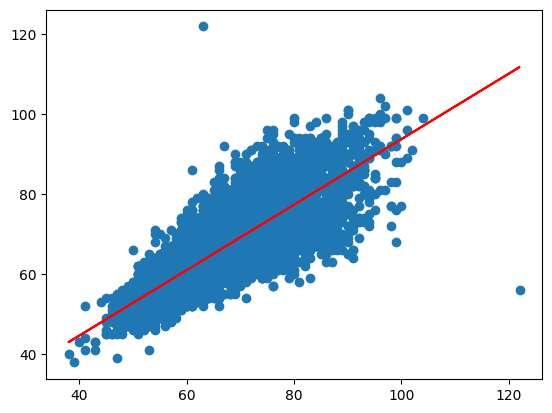

In [169]:
plt.scatter(x,y)
plt.plot(x,predictions,color="red")

#### Calculating Coefficient of Determination, R-squared
The coefficient of determination, or $R^2$, is a measure that provides information about the goodness of fit of a model. In the context of regression it is a statistical measure of how well the regression line approximates the actual data. It is therefore important when a statistical model is used either to predict future outcomes or in the testing of hypotheses.

In [170]:
SSR = ((y - predictions)**2).sum() #Sum of Square due to Regression
SST = ((y - y.mean())**2).sum() # Sum of Square Total
r2 = 1 - (SSR/SST)
print(f"Coefficient of Determination,R-squared: {r2}.")

Coefficient of Determination,R-squared: tmax_tomorrow    0.670042
dtype: float64.


### Confirming Results using scikit-learn

[11.98656138]
[[0.81854683]]


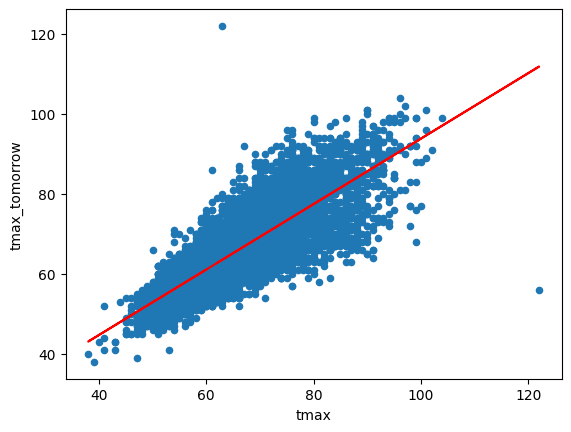

In [171]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data[["tmax"]],data[["tmax_tomorrow"]])
print(lr.intercept_)
print(lr.coef_)
data.plot.scatter("tmax","tmax_tomorrow")
plt.plot(data[["tmax"]],lr.predict(data[["tmax"]]),'red')